In [177]:
import keras
import os
import pickle
import cv2 as cv2
from params import get_params
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np
from os import walk
import matplotlib.pyplot as plt
from build_database import build_database
from PIL import Image, ImageOps;
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [178]:
descriptors = pickle.load(open("descriptor.p", "rb"))

In [179]:
descriptors2 = pickle.load(open("descriptor2.p", "rb"))

In [180]:
descriptors3 = pickle.load(open("descriptor3.p", "rb"))

In [181]:
#ac=100 - 50:mal
ac=100
desc_val= descriptors[ac]

In [182]:
descriptors.shape

(477, 1, 4096)

In [183]:
imagen = pickle.load(open("imagen.p", "rb")) #Leo las imagenes de val del pickle

In [184]:
len(imagen)

477

In [185]:
imagen2 = pickle.load(open("imagen2.p", "rb")) #Leo las imagenes de test del pickle

In [186]:
len(imagen2)

717

In [187]:
imagen3 = pickle.load(open("imagen3.p", "rb")) #Leo las imagenes de train del pickle

In [188]:
len(imagen3)

1194

In [189]:
descriptors_val=np.reshape(desc_val,(1,4096)) #Hago un reshape ya que me salia (477, 1, 4096)

In [190]:
descriptors_train=np.reshape(descriptors3,(1194,4096)) #Hago un reshape ya que me salia (1194, 1, 4096)

In [191]:
#Hago la lectura de todas las líneas del .txt
with open("./TB2017/val/annotation.txt",'r') as f:
        archivo1 = f.readlines()
        

In [192]:
#archivo1

In [193]:
archivo1.sort()#Ordeno la lista de archivos para tenerlo en el mismo orden que las imagenes.

In [194]:
#archivo1

In [195]:
pictionari = {}
ip=0
for ip in range(len(archivo1)):
    pictionari[archivo1[ip][0:10]] = archivo1[ip][11:len(archivo1[ip])-1] #Aquí genero un diccionario de nombres y etiquetas.

In [196]:
len(archivo1)

478

In [197]:
archivo1[1][0:10]

'acgulrdzax'

In [198]:
archivo1[2][11:len(archivo1[ip])-1]

'dona_treballador'

In [199]:
pictionari['acgulrdzax']

'teatre_principal'

In [200]:
pictionari_val = {}
ipp=0
for ipp in range(len(archivo1)-1):
    pictionari_val[ipp]=pictionari[archivo1[ipp+1][0:10]] #Aquí relaciono las etiquetas con los índices del vector

In [201]:
len(pictionari_val)

477

In [202]:
#Ahora lo mismo para las otra. Ya que no empleamos test.
#Así obtengo un diccionario que me relaciona los elementos de los vectores de las fotos con sus etiquetas

In [203]:
#Hago la lectura de todas las líneas del .txt
with open("./TB2017/train/annotation.txt",'r') as f:
        archivo3 = f.readlines()
        

In [204]:
archivo3.sort()#Ordeno la lista de archivos para tenerlo en el mismo orden que las imagenes.

In [205]:
pictionari3 = {}
ipo=0
for ipo in range(len(archivo3)):
    pictionari3[archivo3[ipo][0:10]] = archivo3[ipo][11:len(archivo3[ipo])-1] #Aquí genero un diccionario de nombres y etiquetas.

In [206]:
pictionari_train = {}
ippo=0
for ippo in range(len(archivo3)-1):
    pictionari_train[ippo]=pictionari3[archivo3[ippo+1][0:10]] #Aquí relaciono las etiquetas con los índices del vector

In [207]:
#Recuento de Relevantes de cada tipo, utilizaré un diccionario ya que es lo mismo que un map y me es muy cómodo.

In [208]:
len(archivo3)

1195

In [209]:
relevantes = {}
lop=0
for lop in range(len(archivo3)):
    if relevantes.get(archivo3[lop][11:len(archivo3[lop])-1]):
        relevantes[archivo3[lop][11:len(archivo3[lop])-1]]=relevantes[archivo3[lop][11:len(archivo3[lop])-1]]+1
    else: 
        relevantes[archivo3[lop][11:len(archivo3[lop])-1]] =1
del relevantes["ssID"] # Así elimino la primera línea // Solo correr una vez.

In [210]:
relevantes

{'ajuntament': 75,
 'castell_cartoixa': 75,
 'catedral': 75,
 'desconegut': 295,
 'dona_treballadora': 74,
 'escola_enginyeria': 75,
 'estacio_nord': 75,
 'farmacia_albinyana': 75,
 'masia_freixa': 75,
 'mercat_independencia': 75,
 'mnactec': 75,
 'societat_general': 75,
 'teatre_principal': 75}

In [211]:
x_val_normalized = sklearn.preprocessing.normalize(descriptors_val, norm='l2', axis=1, copy=True, return_norm=False)

In [212]:
x_train_normalized = sklearn.preprocessing.normalize(descriptors_train, norm='l2', axis=1, copy=True, return_norm=False)

In [213]:
x_train_normalized= x_train_normalized.transpose()

In [214]:
Last = np.matmul(x_val_normalized,x_train_normalized,out = None)

In [215]:
ranks = np.argsort(Last,axis = 1)[:,::-1]

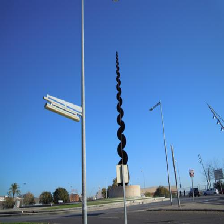

In [216]:
imagen[1]

In [217]:
x_val_images = []
for ol in range(477):   
    
    x_val_images.append(np.array(imagen[ol]))
    

In [218]:
x_train_images = []

for oil in range(1194):   
    
    x_train_images.append(np.array(imagen3[oil]))

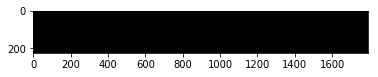

In [219]:
from PIL import Image, ImageOps;
# get the original images for visualization
# x_test_normalized = np.empty((717,4096))
h,w = (224, 224)
new_image= Image.new('RGB', (h*8,w*1))
plt.imshow(new_image)

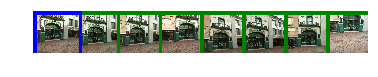

In [220]:
# Visualize ranks of the 10 queries
count=0
k=7
offset = 0 # it will show results from query #'offset' to #offset+10
for q in range(1):
    etiqueta=[]
    ranks_q = ranks[q*(offset+1),:] #Aquí ranks, te coge los que más se parezcan en orden
    for long in range(k):#Aquí miro los K primeras // ranks_q.size
        etiqueta.append(pictionari_train[ranks_q[long]])
    for i in range(k):
        if pictionari_val[ac] == etiqueta[i]:
            #new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))
            new_image.paste( ImageOps.expand(Image.fromarray(x_train_images[ranks_q[i]]),border=20,fill='green'), (h*(1+i),w*q ))
            count =count+1
        else:
            new_image.paste( ImageOps.expand(Image.fromarray(x_train_images[ranks_q[i]]),border=20,fill='red'), (h*(1+i),w*q ))
            
  # visualize query
    ima_q = Image.fromarray(x_val_images[ac])
    ima_q = ImageOps.expand(ima_q, border=20, fill='blue')
    new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()

In [221]:
ranks_q[1193]

504

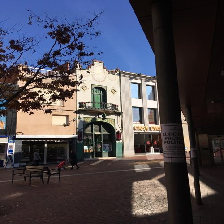

In [222]:
imagen3[888]

In [223]:
pictionari_train[887]

'desconegut'

In [224]:
#
count=0
k=1194 #5 , 75 y 1194
offset = 0 # it will show results from query #'offset' to #offset+10
total = relevantes[pictionari_val[ac]]
precision=[]
numrellevants = 0
for q in range(1):
    etiqueta=[]
    ranks_q = ranks[q*(offset+1),:] #Aquí ranks, te coge los que más se parezcan en orden
    for long in range(k):#Aquí miro los K primeras // ranks_q.size
        etiqueta.append(pictionari_train[ranks_q[long]])
    
    for i in range(k):
        if pictionari_val[ac] == etiqueta[i]:
            #new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))
            count = count + 1
            total = total - 1
            precision.append(count / float(i+1))
        if total == 0:
            break
        numrellevants = 1 + numrellevants

            

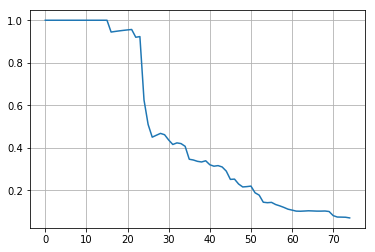

In [225]:
plt.plot(precision)
plt.grid()

In [226]:
count=0
k=len(pictionari_train)
total = relevantes[pictionari_val[ac]]
offset = 0 # it will show results from query #'offset' to #offset+10
recall=[]
for q in range(1):
    etiqueta=[]
    ranks_q = ranks[q*(offset+1),:] #Aquí ranks, te coge los que más se parezcan en orden
    for long in range(k):#Aquí miro los K primeras // ranks_q.size
        etiqueta.append(pictionari_train[ranks_q[long]])
    
    for i in range(k):
        if pictionari_val[ac] == etiqueta[i] and total != 0:
            #new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))
            total = total-1
            count =count+1
            recall.append(count/float(relevantes[pictionari_val[ac]]))
        if total == 0:
            break

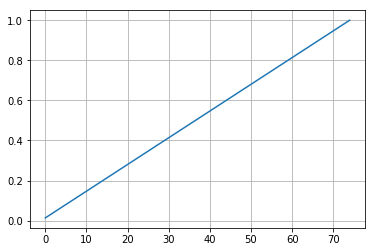

In [227]:
plt.plot(recall)
plt.grid()

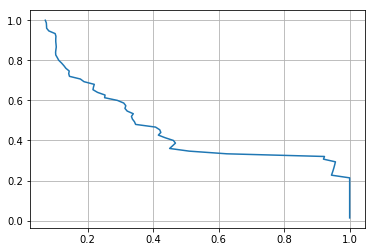

In [228]:
plt.plot(precision,recall)
plt.grid()

In [229]:
len(precision)

75

In [ ]:
precision/75

In [230]:
suma=0 
for i in precision:
    suma += i

print suma

35.9430490832


In [231]:
AP = suma/float(len(precision))

In [232]:
AP

0.47924065444217545